In [10]:
%pylab 
from nugridpy import nugridse as mp
from nugridpy import mesa as ms

data_dir="/data/nugrid_apod2"    

ms.set_nugrid_path(data_dir)
mp.set_nugrid_path(data_dir)

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [11]:
s=ms.star_log(mass=15,Z=0.02)

nugrid_path = /data/nugrid_apod2
closest set is set1.2 (Z = 0.02)
closest mass is 15.0
Using old star.logsa file ...
 reading ...100% 

Closing star.log  tool ...


In [12]:
pt_exp=mp.se(mass=15,Z=0.02, type='ppd_exp')
pt_pre=mp.se(mass=15,Z=0.02, type='ppd_wind')


nugrid_path = /data/nugrid_apod2
closest set is set1.2 (Z = 0.02)
closest mass is 15.0
Searching files, please wait.......
Reading preprocessor files
File search complete.
Closing plot_tools
nugrid_path = /data/nugrid_apod2
closest set is set1.2 (Z = 0.02)
closest mass is 15.0
Searching files, please wait.......
Reading preprocessor files
File search complete.
Closing plot_tools


Here below there is a piece of code that look for the masscut, to use for plotting. We do not care of what is below the masscut

In [24]:
cyc_exp = pt_exp.se.cycles[len(pt_exp.se.cycles)-1]
cyc_exp_0 = pt_exp.se.cycles[0]

cyc_pre = pt_pre.se.cycles[len(pt_pre.se.cycles)-1]

masscut =  max(pt_exp.se.get(cyc_exp,'mass'))
mass_coo = pt_exp.se.get(cyc_exp,'mass')
temp = pt_exp.se.get(cyc_exp_0,'temperature')

mass_coo_min = len(temp)
j=0
for i in temp:
    if i > 1.05e-9:
        dum = mass_coo[j]
        masscut = min(dum,masscut)
        mass_coo_min = min(j,mass_coo_min)
    j=j+1

 reading ['temperature']...100%

In [26]:
# exctract Tmax vs mass
max_t = 0.
for i in pt_exp.se.cycles:
    dum=pt_exp.se.get(i,'temperature')[mass_coo_min]
    max_t=max(dum,max_t)
    if dum == max_t:
        cyc_max_t = i
        
print(cyc_max_t,max_t)

 reading ['temperature']...100%('0000020511', 5.4711714561478484)


In [27]:
# I will have to choose between these
temperature_peak_array = pt_exp.se.get(cyc_max_t,'temperature')

 reading ['temperature']...100%

Here below you can see that for all mass coordinates we have peak temperature at the same cycle, cyc_max_t. We are lucky... this time. Does not have to be always the case.
Use the plot below in the following way. Check the abundance profiles that you care about, and based on that check the peak temperatures relevant to trigger the production of destruction of them. 
The next step will be just to get the trajectories that you care about.

<IPython.core.display.Javascript object>


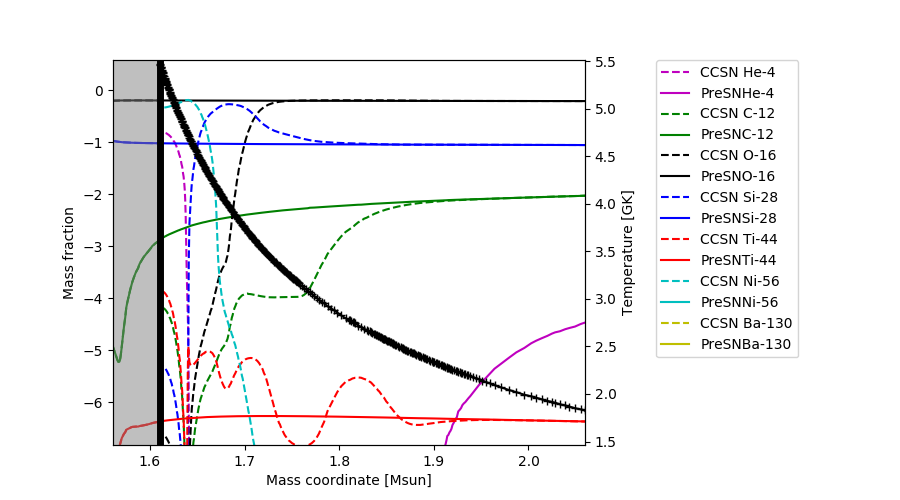

 reading ['temperature']...100%

In [42]:
iso = ['He-4','C-12','O-16','Si-28','Ti-44','Ni-56','Ba-130']
col = ['m','g','k','b','r','c','y','m']
lin = '-'
llin='--'


fig, ax1 = subplots(figsize=(9,5))
ax2 = ax1.twinx()

#ax1.figure(figsize=(9,6))

j=0
for i in iso:
    ax1.plot(pt_exp.se.get(cyc_exp,'mass'),log10(pt_exp.se.get(cyc_exp,'iso_massf',i)),col[j]+llin,label='CCSN '+i)
    ax1.plot(pt_pre.se.get(cyc_pre,'mass'),log10(pt_pre.se.get(cyc_pre,'iso_massf',i)),col[j]+lin,label='PreSN'+i)
    j=j+1


#plot(pt_exp.se.get(cyc_max_t,'mass'),pt_exp.se.get(cyc_max_t,'temperature'),'k-')
    
ax1.legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)    
axvline(x=masscut,color='k',linewidth=5)  
axvspan(0.0, masscut, facecolor='0.5', alpha=0.5)

ax1.set_ylabel('Mass fraction')

ax1.set_ylim(-10,1)
ax1.set_xlim(0,6)

ax2.plot(pt_exp.se.get(cyc_max_t,'mass'),pt_exp.se.get(cyc_max_t,'temperature'),'k-+')


ax1.set_xlabel('Mass coordinate [Msun]')
ax2.set_ylabel('Temperature [GK]')

fig.subplots_adjust(right=0.65)
fig.show()

# Astrophysical motivation behind temp_array

Some text...

In [45]:
#choose a set of trajectories from a set of peak temperatures
temp_array = [1.5,2.5,2.75,3.,3.1,3.5,3.97,max(temperature_peak_array)]
index_temp_array = []
for i in temp_array:
    index_temp_array.append(numpy.argmin(numpy.abs(i - temperature_peak_array)))


Here we start with the trajectory

In [57]:
m_coor = []
for i in index_temp_array:
    m_coor.append(pt_exp.se.get(cyc_exp,'mass')[i])

model_start = int(cyc_exp_0)
model_stop = int(cyc_exp)
r_array = []
rho_array = []
temperature_array = []
time_array = []
for i in m_coor:
    r,rho,temperature, time = pt_exp.trajectory(model_start, model_stop, 5,\
                 i, age_in_sec=False, online=False)
    r_array.append(r)
    rho_array.append(rho)
    temperature_array.append(temperature)
    time_array.append(time)
    
# units
# rho           g
# temperature   K
# time          s


 reading ['age']...100%00%.100%

In [59]:
from nugridpy import ascii_table as at

In [65]:
%rm traj_*dat
%rm trajectory*.input
j=0
for i in m_coor:
    at.writeTraj(filename='trajectory'+str(i)+'.input', data=[time_array[j],temperature_array[j],rho_array[j]], \
             ageunit=1, tunit=1, rhounit=0, idNum=0)
    j=j+1

In [66]:
# calculate the initial abundance files
for i in m_coor:
    pt_exp.abund_at_masscoordinate(model_start,i,online=False)

 reading ['rho']...100%]...100%iso_massf
 reading ['rho']...100%iso_massf
 reading ['rho']...100%]...100%iso_massf
 reading ['rho']...100%iso_massf
 reading ['rho']...100%iso_massf
 reading ['rho']...100%iso_massf
 reading ['rho']...100%iso_massf
 reading ['rho']...100%iso_massf
 reading ['iso_massf']...100%

In [70]:
pt_exp.se.get('temperature_unit')/1e9

1.0